In [1]:
from __future__ import print_function

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
df = pd.read_csv('int_online_tx_data.csv')

### Data is Transactional, explore it

In [4]:
df.shape

(35116, 8)

In [9]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583.0,France
5,536370,10002,INFLATABLE POLITICAL GLOBE,48,12/1/10 8:45,0.85,12583.0,France
6,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,24,12/1/10 8:45,1.25,12583.0,France
7,536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18,12/1/10 8:45,2.95,12583.0,France
8,536370,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,12/1/10 8:45,2.95,12583.0,France
9,536370,22629,SPACEBOY LUNCH BOX,24,12/1/10 8:45,1.95,12583.0,France


#### As, earlier the clustering was performed using countries, see the distribution

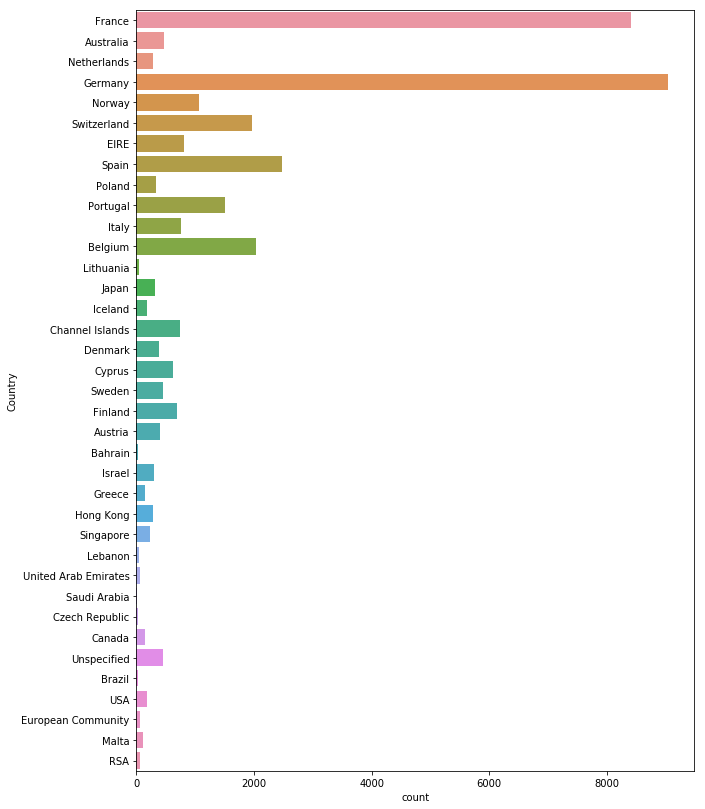

In [11]:
# Make figsize 6x7
plt.figure(figsize=(10,14))

# Bar plot by country
sns.countplot(y='Country', data=df)

In [12]:
df.Country.value_counts()

Germany                 9040
France                  8407
Spain                   2484
Belgium                 2031
Switzerland             1966
Portugal                1501
Norway                  1071
EIRE                     815
Italy                    758
Channel Islands          748
Finland                  685
Cyprus                   614
Australia                468
Sweden                   451
Unspecified              446
Austria                  398
Denmark                  380
Poland                   330
Japan                    321
Israel                   295
Hong Kong                284
Netherlands              283
Singapore                222
Iceland                  182
USA                      179
Canada                   151
Greece                   145
Malta                    112
United Arab Emirates      68
European Community        60
RSA                       57
Lebanon                   45
Lithuania                 35
Brazil                    32
Czech Republic

## Missing Data

In [15]:
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     1418
Country           0
dtype: int64

In [16]:
#drop data without customer id as it doesn't serve our purpose of customer segmenting
df = df[df.CustomerID.notnull()]

In [17]:
df.shape

(33698, 8)

In [18]:
df.dtypes

InvoiceNo        int64
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [19]:
#float CustomerIDs does not make sense, convert to ints
df.CustomerID = df.CustomerID.astype(int)

In [20]:
df.dtypes

InvoiceNo        int64
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int64
Country         object
dtype: object

### create a column to capture sale value of each row of transaction

In [21]:
df['Sales'] = df.UnitPrice * df.Quantity

In [22]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583,France,90.0
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583,France,90.0
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583,France,45.0
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583,France,10.2
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583,France,15.6
5,536370,10002,INFLATABLE POLITICAL GLOBE,48,12/1/10 8:45,0.85,12583,France,40.8
6,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,24,12/1/10 8:45,1.25,12583,France,30.0
7,536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18,12/1/10 8:45,2.95,12583,France,53.1
8,536370,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,12/1/10 8:45,2.95,12583,France,70.8
9,536370,22629,SPACEBOY LUNCH BOX,24,12/1/10 8:45,1.95,12583,France,46.8


In [23]:
df.to_csv('cleaned_transactions.csv', index=None)

## Customer-level feature engg

#### Number of unique invoices per customer

In [24]:
invoice_data = df.groupby('CustomerID').InvoiceNo.agg({'total_transactions' : 'nunique'})

/Users/dvarshne/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [25]:
invoice_data.head()

,total_transactions
CustomerID,
12347,7
12348,4
12349,1
12350,1
12352,8


In [41]:
invoice_data.shape

(414, 1)

#### Total number of products and unique products per customer

In [26]:
product_data = df.groupby('CustomerID').StockCode.agg({'total_products':'count', 'total_unique_products':'nunique'})

/Users/dvarshne/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [27]:
product_data.head()

,total_products,total_unique_products
CustomerID,,
12347,182,103
12348,31,22
12349,73,73
12350,17,17
12352,85,59


In [42]:
product_data.shape

(414, 2)

#### Total sales and avg per row value (avg product value) per customer

In [28]:
sales_data = df.groupby('CustomerID').Sales.agg({'total_sales':'sum', 'avg_product_value':'mean'})

/Users/dvarshne/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [29]:
sales_data.head()

,avg_product_value,total_sales
CustomerID,,
12347,23.681319,4310.00
12348,57.975484,1797.24
12349,24.076027,1757.55
12350,19.670588,334.40
12352,29.482824,2506.04


In [43]:
sales_data.shape

(414, 2)

# Cart level features

In [35]:
cart_data = df.groupby(['CustomerID', 'InvoiceNo']).Sales.agg({'cart_value':'sum'})

/Users/dvarshne/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [36]:
cart_data.reset_index(inplace=True)
cart_data.head()

,CustomerID,InvoiceNo,cart_value
0,12347,537626,711.79
1,12347,542237,475.39
2,12347,549222,636.25
3,12347,556201,382.52
4,12347,562032,584.91


### Cart specific data per customer

In [37]:
agg_cart_data = cart_data.groupby('CustomerID').cart_value.agg({ 'avg_cart_value':'mean',
                                                                'min_cart_value':'min',
                                                                'max_cart_value':'max'})

/Users/dvarshne/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
agg_cart_data.head()

,min_cart_value,max_cart_value,avg_cart_value
CustomerID,,,
12347,224.82,1294.32,615.714286
12348,227.44,892.80,449.310000
12349,1757.55,1757.55,1757.550000
12350,334.40,334.40,334.400000
12352,120.33,840.30,313.255000


In [44]:
agg_cart_data.shape

(414, 3)

In [46]:
type(agg_cart_data)

pandas.core.frame.DataFrame

## Join together all the Customer-level features

In [47]:
customer_df = invoice_data.join([product_data, sales_data, agg_cart_data])

In [48]:
customer_df.shape

(414, 8)

In [49]:
customer_df.head(10)

,total_transactions,total_products,total_unique_products,avg_product_value,total_sales,min_cart_value,max_cart_value,avg_cart_value
CustomerID,,,,,,,,
12347,7,182,103,23.681319,4310.00,224.82,1294.32,615.714286
12348,4,31,22,57.975484,1797.24,227.44,892.80,449.310000
12349,1,73,73,24.076027,1757.55,1757.55,1757.55,1757.550000
12350,1,17,17,19.670588,334.40,334.40,334.40,334.400000
12352,8,85,59,29.482824,2506.04,120.33,840.30,313.255000
12353,1,4,4,22.250000,89.00,89.00,89.00,89.000000
12354,1,58,58,18.610345,1079.40,1079.40,1079.40,1079.400000
12355,1,13,13,35.338462,459.40,459.40,459.40,459.400000
12356,3,59,53,47.651356,2811.43,58.35,2271.62,937.143333


In [50]:
customer_df.to_csv('analytical_base_table.csv')